# Project Three

https://classroom.github.com/a/feP-p3J8

#### Set-up

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Optical Character Recognition

As a prototypical image analysis and categorization task we look at identifying the correct digit (0..9) in digital images of handwritten digits. For this project we'll use the digits dataset built into sklearn. In future projects we will the use the MNIST data set of handwritten digits which consists of larger images (28x28 pixels) and contains more samples (>50000).

#### sklearn digits dataset

In [2]:
from sklearn.datasets import load_digits

### a) Describe and visualize the data, for example how many samples, feature and target  dimensionality?  Visualize some of the digits (<=100). 

The number of samples is:  1797
The number of data points in each image is:  64
The names of the target categories are:  [0 1 2 3 4 5 6 7 8 9]


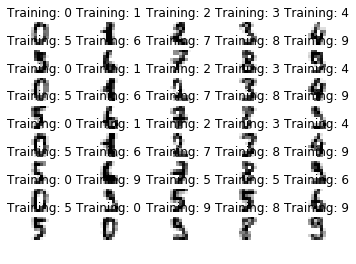

In [3]:
digits= load_digits()
#print(digits.images[0:4, 0:9, 0:8])
print('The number of samples is: ', digits.data.shape[0])
print('The number of data points in each image is: ', digits.data.shape[1])
#print(digits.data)
print('The names of the target categories are: ', digits.target_names)
#print(digits.DESCR)


#From http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(8, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    

### b) How useful is it to graph the dependency of the target on each feature or a pair of features as we have done in previous projects?  Read in the textbook and in the sklearn documentation about dimensionality reduction using 

** Principal Component Analysis (PCA)**

* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* http://scikit-learn.org/stable/modules/decomposition.html

and

** Manifold Learning ** 

* https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
* http://scikit-learn.org/stable/modules/manifold.html


Apply on example each of PCA and Manifold Learning to the digits data set. Keep two dimensions.

[[ -1.25946643  21.27487764]
 [  7.95761142 -20.76870211]
 [  6.99192242  -9.95597836]
 ...
 [ 10.80128379  -6.96025545]
 [ -4.87209775  12.42393962]
 [ -0.34438914   6.36554898]]


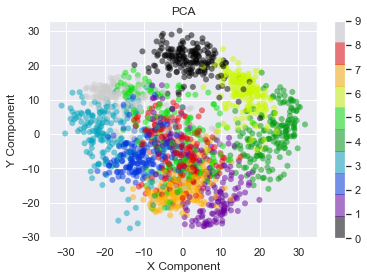

In [4]:
#It appears to be very useful to visualize the data, as it could help to highlight what elements can be focused on, or discarded. 
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

#Project to two dimensions.
pcas = PCA(2)
#Preserve 90% of cumulative explained variance
pca = PCA(0.9)
digits_fit = pca.fit(digits.data)
split = pcas.fit_transform(digits.data)
#print(pca.components_)
print(split)

plt.scatter(split[:, 0], split[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('X Component')
plt.ylabel('Y Component')
plt.title('PCA')
plt.colorbar();



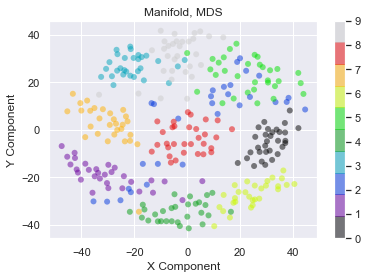

In [5]:
from sklearn.manifold import MDS

#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS
#https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

#Setting up the manifold, using all default values like n_components = 2
#Visualizing first 300 points (or else it takes a while)
mani = MDS()
digits_mani = mani.fit_transform(digits.data[:300])
digits_mani.shape


plt.scatter(digits_mani[:, 0], digits_mani[:, 1],
            c=digits.target[:300], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('X Component')
plt.ylabel('Y Component')
plt.title('Manifold, MDS')
plt.colorbar();

### c) Supervised Learning

Apply one of the methods we have looked at so far for supervised learning (for example Support Vector Machines, Decision Trees and Random Forests) to the digits problem. Use model validation and parameter searches as needed. How accurate is your model? Use appropriate measures to describe the accuracy of your model.

In [59]:
#Import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Split data into train and test
data_train, data_test, target_train, target_test = train_test_split( digits.data, digits.target, test_size = 0.3, random_state = 100)

#Listing the parameters for DecisionTreeClassifier
criterion_grid = ['gini', 'entropy']
max_feature_grid = ['auto', 'log2']
iteration = np.arange(0,10,1)

#Setting up lists to be appended
score = []
cv_score = []

#Iterating through a handful of important parameters to see if one combination yields better results. 
#Each combination of parameters was iterated over 10 times to smooth out variations from the randomness in the train/test split
for criteria in criterion_grid:
    for max_f in max_feature_grid:
            for iterate in iteration:
                #Using DecisionTreeCLassifier as the supervised learning method. 
                dec_tree = DecisionTreeClassifier(class_weight=None, criterion = criteria, max_features = max_f)
                tree_class = dec_tree.fit(data_train,target_train)
                target_pred = tree_class.predict(data_test)
                clf = accuracy_score(target_test, target_pred)
                score.append(clf)
                #Verifying the DecisionTreeClassifier with cross validation. 
                test_cv_score = cross_val_score(tree_class, data_test, target_test)
                cv_score.append(test_cv_score)
            #Averaging over iterations and displaying  
            ave_score = np.mean(score)
            ave_cv_score = np.mean(cv_score)
            print('The average accuracy over ', len(iteration), ' iterations for Criterion:', criteria, ' and Max Features:', max_f, ' is: ', ave_score)
            print('The average cross validated score over ', len(iteration), ' iterations for Criterion:', criteria, ' and Max Features:', max_f, ' is: ', ave_cv_score)
            print()

The average accuracy over  10  iterations for Criterion: gini  and Max Features: auto  is:  0.7972222222222223
The average cross validated score over  10  iterations for Criterion: gini  and Max Features: auto  is:  0.7016896560478438

The average accuracy over  10  iterations for Criterion: gini  and Max Features: log2  is:  0.7992592592592593
The average cross validated score over  10  iterations for Criterion: gini  and Max Features: log2  is:  0.6959042524237027

The average accuracy over  10  iterations for Criterion: entropy  and Max Features: auto  is:  0.801666666666667
The average cross validated score over  10  iterations for Criterion: entropy  and Max Features: auto  is:  0.6999590083883853

The average accuracy over  10  iterations for Criterion: entropy  and Max Features: log2  is:  0.7993518518518519
The average cross validated score over  10  iterations for Criterion: entropy  and Max Features: log2  is:  0.699649186937759



The accuracy from the use of the decision trees can be seen above. However, there seems to be overfitting, as the cross validated scores are consistently lower than the accuracy from the decision trees. 

### d) Exploration: Unsupervised Learning

This part is optional. In supervised learning we use labelled data to train or build a model. In the case of the images of handwritten digits each image is label with the (hopefully) correct digit 0..9. Unsupervised learning tries to extract the fact that there are 10 different objects (the digits 0..9) from the images without knowing the labels. Learn in the textbook about

** k-means Clustering*

* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

and apply some of the techiques to the digits problem.